In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [ ]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [ ]:
df = pd.read_csv(filename, names = headers)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

In [ ]:
#handl NaN

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace=True)

str_avg = df["stroke"].astype("float").mean()
df["stroke"].replace(np.nan, str_avg, inplace = True)

# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

avg_horsepower = df["engine-size"].astype('float').mean(axis=0)
df["engine-size"].replace(np.nan, avg_horsepower, inplace=True)

avg_peak = df["peak-rpm"].astype("float").mean(axis=0)
df["peak-rpm"].replace(np.nan, avg_peak, inplace=True)

avg_peak = df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(np.nan, avg_peak, inplace=True)

avg = df["curb-weight"].astype("float").mean(axis=0)
df["curb-weight"].replace(np.nan, avg, inplace=True)

avg_peak = df["highway-mpg"].astype("float").mean(axis=0)
df["highway-mpg"].replace(np.nan, avg_peak, inplace=True)

df[["price"]] = df[["price"]].astype("int")
df[["horsepower"]] = df[["horsepower"]].astype("int")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("int")

Average of normalized-losses: 122.0
Average of bore: 3.3297512437810943


In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
#create linear regression object
lm=LinearRegression()

#define predictor variable and target variable
x = df[['highway-mpg']]
x
y = df['price']

#fit the model, define parameters b0 b1
lm.fit(x,y)

#obtain prediction
yhat = lm.predict(x)
yhat

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

In [ ]:
#intercept b0
lm.intercept_

#slope b1
lm.coef_

#relashioship btw pric and highway mpg
#price = 38423-821.73(highway mpg)

array([-821.73337832])

**Multiple Linear regression (MLR)**

In [ ]:
z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]

#train
lm.fit(z,df["price"])

#predict
yhat = lm.predict([[2,3,4,5]])
yhat

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-15201.9430331])

**Model evaluating**

(0.0, 48187.27788610386)

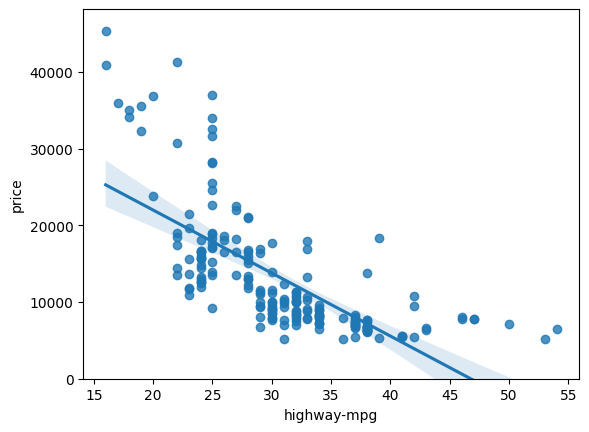

In [ ]:
sns.regplot(x='highway-mpg', y= 'price', data=df)
plt.ylim(0,)

**Residual Plot**

**Distribution Plot**

<ipython-input-13-f6ef65da4d02>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl = sns.distplot(df["price"], hist=False, color = 'r', label='actual value')


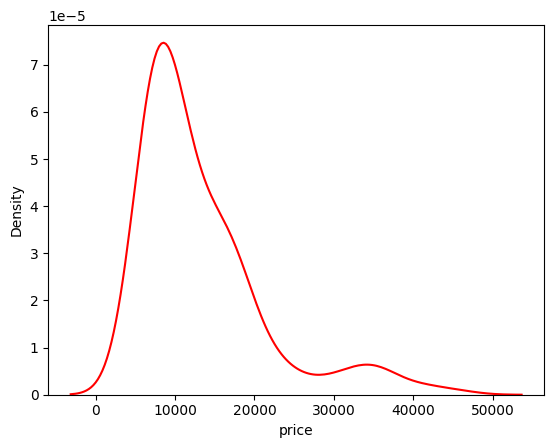

In [ ]:
axl = sns.distplot(df["price"], hist=False, color = 'r', label='actual value')


In [ ]:
sns.distplot(yhat, hist=False, color = 'b', label='predicted value', ax=axl)

<ipython-input-14-3a1e510f0ba8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat, hist=False, color = 'b', label='predicted value', ax=axl)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='price', ylabel='Density'>

**Polynomial Regression**

In [ ]:
#calculate polynomial if third order
x = df["highway-mpg"]
y = df["price"]
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


**Polynomial Regression with more than one dimension**

In [ ]:
pr = PolynomialFeatures(degree=2, include_bias=False)
#z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
x_polly = pr.fit_transform([[1,2]])
x_polly

array([[1., 2., 1., 2., 4.]])

**Normalizing**

In [ ]:
SCALE = StandardScaler()
SCALE.fit(df[["horsepower","highway-mpg" ]])
x_scale = SCALE.transform(df[["horsepower","highway-mpg" ]])
x_scale

array([[ 0.20409024, -0.54228772],
       [ 0.20409024, -0.54228772],
       [ 1.35775403, -0.689386  ],
       [-0.03737428, -0.10099285],
       [ 0.3114078 , -1.27777915],
       [ 0.17726085, -0.83648429],
       [ 0.17726085, -0.83648429],
       [ 0.17726085, -0.83648429],
       [ 0.98214257, -1.57197573],
       [-0.06420367, -0.24809114],
       [-0.06420367, -0.24809114],
       [ 0.47238415, -0.39518943],
       [ 0.47238415, -0.39518943],
       [ 0.47238415, -0.83648429],
       [ 2.10897697, -1.27777915],
       [ 2.10897697, -1.27777915],
       [ 2.10897697, -1.57197573],
       [-1.48616137,  3.28226775],
       [-0.89591477,  1.81128488],
       [-0.89591477,  1.81128488],
       [-0.94957356,  1.51708831],
       [-0.94957356,  1.07579344],
       [-0.03737428, -0.10099285],
       [-0.94957356,  1.07579344],
       [-0.94957356,  1.07579344],
       [-0.94957356,  1.07579344],
       [-0.03737428, -0.10099285],
       [-0.41298574, -0.10099285],
       [ 1.11628952,

**Pipelines**
Normlization --> Polynomial Transform --> Linear regression

In [ ]:
from numpy.lib import polynomial
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('mode', LinearRegression())]
pip = Pipeline(input)
Z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
Y = df['price']
pip.fit(Z,Y)
yhat = pip.predict(X[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])

array([13103.67557905, 13103.67557905, 18229.84126783, 10394.17656982,
       16132.61710554, 13878.51122869, 15040.02728884, 15456.82939524,
       17970.56357234, 10513.39695705, 10513.39695705, 15846.98682865,
       16069.32766554, 18545.97990377, 25223.60347567, 25177.53535046,
       26516.23198422,  5902.09772552,  6230.56105306,  6270.26797569,
        5978.26463607,  5832.68583287, 10114.32080588,  6061.12350009,
        6118.25487011,  6118.25487011, 10047.97305843, 11298.48195706,
       18337.16623951,  7341.69186767,  6424.136504  ,  5175.24190396,
        6620.24349346,  6652.95977352,  6766.27331489,  6796.38028687,
        8797.4978042 ,  8949.16311354,  8992.86874397,  9195.32515923,
       10929.97948993, 10057.10461096,  9655.22737301, 12123.11090937,
       36318.96050758, 36318.96050758, 41645.5887043 ,  5908.64417371,
        5927.87890666,  5940.84374466,  6045.94154206,  6059.25115341,
       10195.61726448, 10195.61726448, 10184.03870223, 15941.74595865,
      

**Measures for In-Sample Evaluation**

Mean Squared Error: how close a regression line is to a set of points. It does this by taking the average distances from the actual points to the predicted points and squaring them.

Less is better

In [ ]:
#create linear regression object
lm=LinearRegression()

#define predictor variable and target variable
X = df[['highway-mpg']]
Y = df['price']

#fit the model, define parameters b0 b1
lm.fit(X,Y)

#obtain prediction
yhat = lm.predict(X)

error = mean_squared_error(df['price'], yhat)
error

31635042.944639888

R-Squared: the percentage of the variation in the response variable y  that is explained by the variation in explanatory variable(s) x.
- 1 identical
- 0 doesnot fit
- negative overfitting

In [ ]:
lm.score(X,yhat)

1.0

In [ ]:
x =np.array(30.0)
#x.reshape(-1,1)
lm.predict(x.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13771.3045085])

In [ ]:
input = np.arange(1,101,1).reshape(-1,1)
yhat = lm.predict(input)
yhat

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 37601.57247984,  36779.83910151,  35958.10572319,  35136.37234487,
        34314.63896655,  33492.90558823,  32671.1722099 ,  31849.43883158,
        31027.70545326,  30205.97207494,  29384.23869662,  28562.50531829,
        27740.77193997,  26919.03856165,  26097.30518333,  25275.57180501,
        24453.83842668,  23632.10504836,  22810.37167004,  21988.63829172,
        21166.9049134 ,  20345.17153508,  19523.43815675,  18701.70477843,
        17879.97140011,  17058.23802179,  16236.50464347,  15414.77126514,
        14593.03788682,  13771.3045085 ,  12949.57113018,  12127.83775186,
        11306.10437353,  10484.37099521,   9662.63761689,   8840.90423857,
         8019.17086025,   7197.43748192,   6375.7041036 ,   5553.97072528,
         4732.23734696,   3910.50396864,   3088.77059031,   2267.03721199,
         1445.30383367,    623.57045535,   -198.16292297,  -1019.8963013 ,
        -1841.62967962,  -2663.36305794,  -3485.09643626,  -4306.82981458,
        -5128.5631929 ,  